In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
class AOStar:
    def __init__(self, graph, start_node, heuristics):
        self.graph = graph
        self.start_node = start_node
        self.heuristics = heuristics
        self.solution_graph = {}

    def expand_nodes(self, node):
        """Expand a node by considering all children (AND/OR nodes)"""
        if node not in self.graph:
            return None
        children = self.graph[node]
        return children

    def compute_and_or_cost(self, node, children):
        """Calculate cost for AND-OR nodes based on children nodes' costs"""
        if children is None:
            return float('inf')

        and_cost = sum(self.heuristics.get(child, float('inf')) for child in children)
        or_cost = min(self.heuristics.get(child, float('inf')) for child in children)
        
        return min(and_cost, or_cost)

    def update_heuristics(self, node):
        """Update heuristic values based on computed AND-OR costs"""
        children = self.expand_nodes(node)
        if children is not None:
            self.heuristics[node] = self.compute_and_or_cost(node, children)

    def ao_star_search(self, node):
        """Main AO* recursive search algorithm to find optimal solution path"""
        self.update_heuristics(node)

        if node not in self.graph or not self.graph[node]:
            return self.heuristics.get(node, float('inf'))  # Handle missing heuristics

        children = self.expand_nodes(node)
        for child in children:
            self.ao_star_search(child)

        self.solution_graph[node] = self.graph[node]

        return self.heuristics.get(node, float('inf'))  # Handle missing heuristics


In [10]:
graph = {
    'Start':['Identify Threat','Evaluate Impact'],
    'Identify Threat':['Analyze Traffic','Scan Logs'],
    'Evaluate Impact':['Low Impact', 'High Impact'],
    'Analyze Traffic': None,
    'Scan Logs': None,
    'Low Impact': None,
    'High Impact':['Mitigate Attack', 'Isolate System'],
    'Mitigate Attack': None,
    'Isolate System': None,
}

In [11]:
heuristics={
    'Start':5,
    'Identify Threat':3,
    'Evaluate Impact':3,
    'Analyze Traffic':2,
    'Scan Logs':2,
    'Low Impact':1,
    'High Impact':5,
    'Mitigate Attack':2,
    'Isolate System':2,
}

In [12]:
ao_star = AOStar(graph=graph, start_node='Start',heuristics=heuristics)
optimal_cost = ao_star.ao_star_search('Start')
print("Optimal Solution Path")
print(ao_star.solution_graph)
print("Heuristic Values after AO* Search:")
print(ao_star.heuristics)
print("Optimal Cost from Start:", optimal_cost)

Optimal Solution Path
{'Identify Threat': ['Analyze Traffic', 'Scan Logs'], 'High Impact': ['Mitigate Attack', 'Isolate System'], 'Evaluate Impact': ['Low Impact', 'High Impact'], 'Start': ['Identify Threat', 'Evaluate Impact']}
Heuristic Values after AO* Search:
{'Start': 3, 'Identify Threat': 2, 'Evaluate Impact': 1, 'Analyze Traffic': 2, 'Scan Logs': 2, 'Low Impact': 1, 'High Impact': 2, 'Mitigate Attack': 2, 'Isolate System': 2}
Optimal Cost from Start: 3


In [13]:
ao_star = AOStar(graph=graph, start_node='Start',heuristics=heuristics)
optimal_cost = ao_star.ao_star_search('Start')
print("Optimal Solution Path")
print(ao_star.solution_graph)
print("Heuristic Values after AO* Search:")
print(ao_star.heuristics)
print("Optimal Cost from Start:", optimal_cost)

Optimal Solution Path
{'Identify Threat': ['Analyze Traffic', 'Scan Logs'], 'High Impact': ['Mitigate Attack', 'Isolate System'], 'Evaluate Impact': ['Low Impact', 'High Impact'], 'Start': ['Identify Threat', 'Evaluate Impact']}
Heuristic Values after AO* Search:
{'Start': 1, 'Identify Threat': 2, 'Evaluate Impact': 1, 'Analyze Traffic': 2, 'Scan Logs': 2, 'Low Impact': 1, 'High Impact': 2, 'Mitigate Attack': 2, 'Isolate System': 2}
Optimal Cost from Start: 1


In [14]:
def visualize_graph(graph, solution_graph, heuristics):
    G = nx.DiGraph()
    for node, children in graph.items():
        if children:
            for child in children:
                G.add_edge(node, child)
    node_colors = ['lightgreen' if node in solution_graph else 'lightblue' for node in G.nodes()]
    node_labels = {node: f"{node}\n(h={heuristics[node]})" for node in G.nodes()}
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12,8))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000, alpha=0.9)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color="gray", arrows=True)
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight="bold")
    edge_labels = {(node, child): "" for node in solution_graph for child in graph.get(node, [])}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.title("Decision Tree Visualization with AO* Optimal Path Highlighted")
    plt.axis("off")
    plt.show()

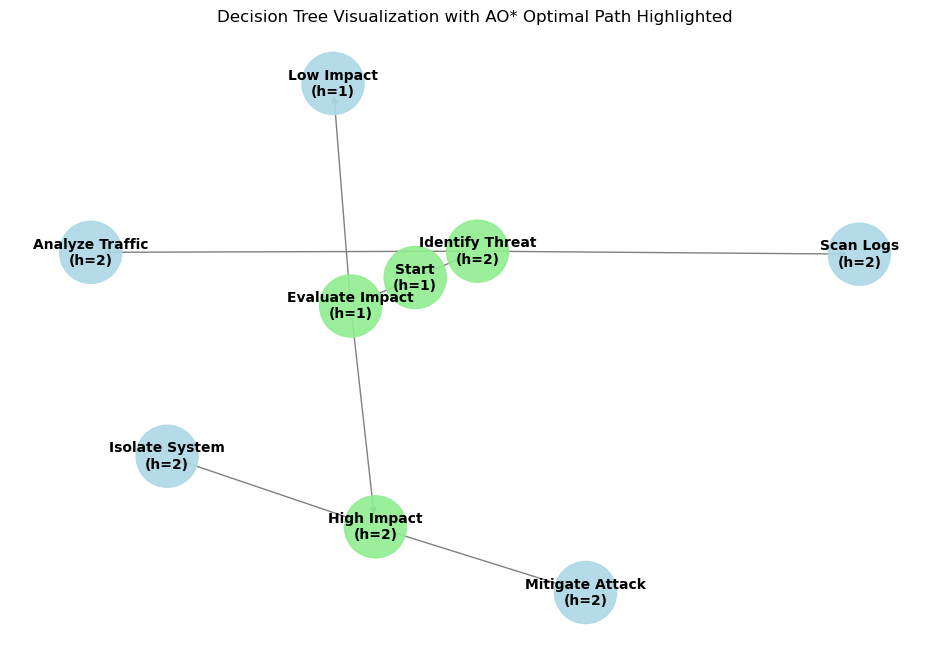

In [15]:
visualize_graph(graph, ao_star.solution_graph, ao_star.heuristics)